# Challenge Set 1 #
Topic: Explore MTA turnstile data

Date: 4/16/16

Name: Melanie Appleby

Worked with: Hyatt Bailey, Liz Bianco, Iain

In [12]:
import urllib
import csv
import os
import datetime
import dateutil.parser
import copy
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
import pandas
import numpy as np
import pickle

%matplotlib inline

In [2]:
def print_small_dict(d, n):
    """
    Print n keys from the dictionary d.
    :param d: dictionary
    :param n: int
    :return: None
    """
    small = {k: d[k] for k in d.keys()[:n]}
    print small

# Challenge 1 #

In [3]:
# Create list of .csv files to read in
file_list = [f for f in os.listdir('small_data/') if '.csv' in f]

# Read in files and create dictionary with first 4 columns as keys
mta_dict = {}
for f in file_list:
    fn = open('small_data/' + f)
    reader = csv.reader(fn)
    reader.next()
    for line in reader:
        key = (line[0], line[1], line[2], line[3]+' '+line[4])
        value = line [5:]            
        if key in mta_dict:
            mta_dict.get(key).append(value)
        else:
            mta_dict[key] = [value]
    fn.close()
    
print_small_dict(mta_dict,1)

{('N500', 'R020', '00-03-04', '47-50 ST-ROCK BDFM'): [['IND', '05/02/2015', '00:00:00', 'REGULAR', '0004785928', '0002794422                                       '], ['IND', '05/02/2015', '04:00:00', 'REGULAR', '0004786049', '0002794429                                       '], ['IND', '05/02/2015', '08:00:00', 'REGULAR', '0004786069', '0002794514                                       '], ['IND', '05/02/2015', '12:00:00', 'REGULAR', '0004786176', '0002794688                                       '], ['IND', '05/02/2015', '16:00:00', 'REGULAR', '0004786397', '0002794871                                       '], ['IND', '05/02/2015', '20:00:00', 'REGULAR', '0004786744', '0002794959                                       '], ['IND', '05/03/2015', '00:00:00', 'REGULAR', '0004786975', '0002794997                                       '], ['IND', '05/03/2015', '04:00:00', 'REGULAR', '0004787034', '0002795009                                       '], ['IND', '05/03/2015', '08:00:00', 'REGULAR

# Challenge 2 #

In [4]:
time_dict = defaultdict(list)

# Create new dictionary with only date, time, and entries as values
for key, value in mta_dict.iteritems():
    for v in value:
        date = v[1]
        time = v[2]
        datetime = dateutil.parser.parse(str(date) + ' ' + str(time))
        try:
            entry = int(v[4].lstrip('0'))
        except ValueError:
            entry = 0
        updated_value = [datetime, entry]
        time_dict[key].append(updated_value)

print_small_dict(time_dict,1)

{('N500', 'R020', '00-03-04', '47-50 ST-ROCK BDFM'): [[datetime.datetime(2015, 5, 2, 0, 0), 4785928], [datetime.datetime(2015, 5, 2, 4, 0), 4786049], [datetime.datetime(2015, 5, 2, 8, 0), 4786069], [datetime.datetime(2015, 5, 2, 12, 0), 4786176], [datetime.datetime(2015, 5, 2, 16, 0), 4786397], [datetime.datetime(2015, 5, 2, 20, 0), 4786744], [datetime.datetime(2015, 5, 3, 0, 0), 4786975], [datetime.datetime(2015, 5, 3, 4, 0), 4787034], [datetime.datetime(2015, 5, 3, 8, 0), 4787057], [datetime.datetime(2015, 5, 3, 12, 0), 4787132], [datetime.datetime(2015, 5, 3, 16, 0), 4787283], [datetime.datetime(2015, 5, 3, 20, 0), 4787611], [datetime.datetime(2015, 5, 4, 0, 0), 4787813], [datetime.datetime(2015, 5, 4, 4, 0), 4787852], [datetime.datetime(2015, 5, 4, 8, 0), 4787891], [datetime.datetime(2015, 5, 4, 12, 0), 4788044], [datetime.datetime(2015, 5, 4, 16, 0), 4788588], [datetime.datetime(2015, 5, 4, 20, 0), 4790628], [datetime.datetime(2015, 5, 5, 0, 0), 4791054], [datetime.datetime(2015, 

# Challenge 3 #

In [5]:
diff_dict = defaultdict(list)

# Create new dictionary where entry counts represent daily and 
# not cumulative counts
for key, rows in time_dict.items():
    rows.sort(key = lambda x: x[0])
    for i in range(len(rows)-1):
        diff_dict[key].append([rows[i][0], rows[i+1][1]-rows[i][1]])            

print_small_dict(diff_dict,1)

{('N500', 'R020', '00-03-04', '47-50 ST-ROCK BDFM'): [[datetime.datetime(2015, 5, 2, 0, 0), 121], [datetime.datetime(2015, 5, 2, 4, 0), 20], [datetime.datetime(2015, 5, 2, 8, 0), 107], [datetime.datetime(2015, 5, 2, 12, 0), 221], [datetime.datetime(2015, 5, 2, 16, 0), 347], [datetime.datetime(2015, 5, 2, 20, 0), 231], [datetime.datetime(2015, 5, 3, 0, 0), 59], [datetime.datetime(2015, 5, 3, 4, 0), 23], [datetime.datetime(2015, 5, 3, 8, 0), 75], [datetime.datetime(2015, 5, 3, 12, 0), 151], [datetime.datetime(2015, 5, 3, 16, 0), 328], [datetime.datetime(2015, 5, 3, 20, 0), 202], [datetime.datetime(2015, 5, 4, 0, 0), 39], [datetime.datetime(2015, 5, 4, 4, 0), 39], [datetime.datetime(2015, 5, 4, 8, 0), 153], [datetime.datetime(2015, 5, 4, 12, 0), 544], [datetime.datetime(2015, 5, 4, 16, 0), 2040], [datetime.datetime(2015, 5, 4, 20, 0), 426], [datetime.datetime(2015, 5, 5, 0, 0), 109], [datetime.datetime(2015, 5, 5, 4, 0), 36], [datetime.datetime(2015, 5, 5, 8, 0), 207], [datetime.datetime(

In [6]:
daily = defaultdict(list)

# Create new dictionary where entry counts are summed over one day
for key, rows in diff_dict.items():
    by_day = {}
    for time in rows:
        day = time[0].date()
        if time[1] < 0:    # Adjust for negative values
            time[1] = 0
        by_day[day] = by_day.get(day, 0) + time[1]
    daily[key] = sorted(by_day.items())

print_small_dict(daily,1) 

{('N500', 'R020', '00-03-04', '47-50 ST-ROCK BDFM'): [(datetime.date(2015, 5, 2), 1047), (datetime.date(2015, 5, 3), 838), (datetime.date(2015, 5, 4), 3241), (datetime.date(2015, 5, 5), 3419), (datetime.date(2015, 5, 6), 3319), (datetime.date(2015, 5, 7), 3436), (datetime.date(2015, 5, 8), 2807)]}


# Challenge 4 #

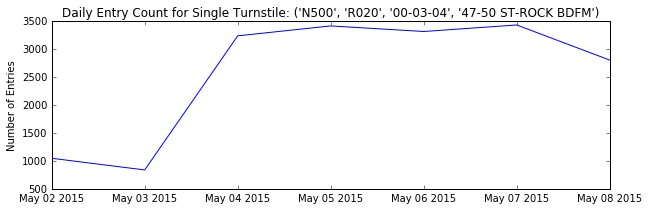

In [7]:
turnstile = daily.keys()[0]
values = daily[turnstile]
dates = [i[0] for i in values]
counts = [i[1] for i in values]

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Daily Entry Count for Single Turnstile: ' + str(turnstile))
plt.ylabel('Number of Entries')

# Challenge 5 #

In [9]:
daily_turnstile_counts = defaultdict(dict)

# Create a dictionary that aggregates turnstiles for the same C/A,
# UNIT, and STATION
for turnstile, data in daily.items():
    unique = (turnstile[0],turnstile[1],turnstile[3])
    if unique in daily_turnstile_counts:
        existing_data = daily_turnstile_counts.get(unique)
        for day in data:
            existing_data[day[0]] = existing_data.get(day[0], 0) 
            + day[1]
    else:
        temp_d = OrderedDict()
        for day in sorted(data):
            temp_d[day[0]] = day[1]
        daily_turnstile_counts[unique] = temp_d

print_small_dict(daily_turnstile_counts,1)

{('C021', 'R212', '59 ST NR'): OrderedDict([(datetime.date(2015, 5, 2), 1232), (datetime.date(2015, 5, 3), 1032), (datetime.date(2015, 5, 4), 2139), (datetime.date(2015, 5, 5), 2108), (datetime.date(2015, 5, 6), 1983), (datetime.date(2015, 5, 7), 2070), (datetime.date(2015, 5, 8), 1841)])}


# Challenge 6 #

In [10]:
daily_station_counts = defaultdict(dict)

# Create dictionary that aggregates data on the STATION level
for turnstile, data in daily.items():
    unique = turnstile[3]
    if unique in daily_station_counts:
        existing_data = daily_station_counts.get(unique)
        for day in data:
            existing_data[day[0]] = existing_data.get(day[0], 0) + day[1]
    else:
        temp_d = OrderedDict()
        for day in sorted(data):
            temp_d[day[0]] = day[1]
        daily_station_counts[unique] = temp_d
        
print_small_dict(daily_station_counts,1)

{'WESTCHESTER SQ 6': OrderedDict([(datetime.date(2015, 5, 2), 3638), (datetime.date(2015, 5, 3), 2458), (datetime.date(2015, 5, 4), 7434), (datetime.date(2015, 5, 5), 7668), (datetime.date(2015, 5, 6), 7491), (datetime.date(2015, 5, 7), 7688), (datetime.date(2015, 5, 8), 6766)])}


### Open pickle containing dict with 5 weeks of data ###

In [13]:
with open('daily_station_counts.pickle','rb') as handle:
    dsc = pickle.load(handle)

### Convert dictionary to pandas DataFrame ###

In [14]:
df = pandas.DataFrame(dsc)

# Adjust for abnormally large values
df[df > 1000000] = 0

# Combine falsely divided stations
df['34 ST-PENN STATION'] = df['34 ST-PENN STA ACE'] + df['34 ST-PENN STA 123ACE']
del df['34 ST-PENN STA ACE']
del df['34 ST-PENN STA 123ACE']
df['14 ST-UNION SQ'] = df['14 ST-UNION SQ 456LNQR'] + df['14 ST-UNION SQ LNQR456']
del df['14 ST-UNION SQ 456LNQR']
del df['14 ST-UNION SQ LNQR456']

# Challenge 7 #

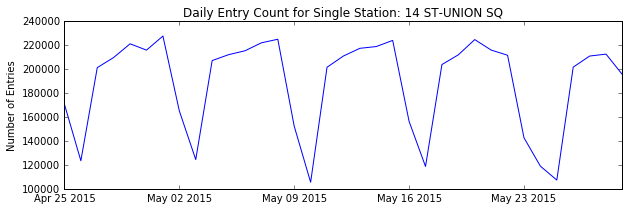

In [15]:
dates = list(df.index)
counts = list(df['14 ST-UNION SQ'].values)
plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.title('Daily Entry Count for Single Station: 14 ST-UNION SQ')
plt.ylabel('Number of Entries')

# Challenge 8 # 

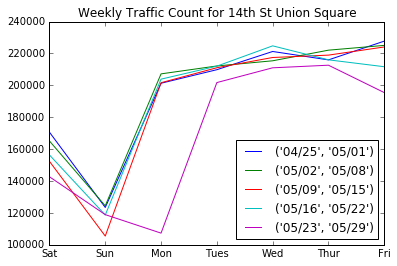

In [16]:
copy = df.copy(deep=True)
weeks = [1] * 7 + [2] * 7 + [3] * 7 + [4] * 7 + [5] * 7
copy['week'] = weeks

week_count_list = []
date_list = []
for i in range(1,6):
    wk = list(copy['14 ST-UNION SQ'][(i-1)*7:i*7])
    dates = (copy['14 ST-UNION SQ'][(i-1)*7:i*7].index[0].strftime('%m/%d'),
             copy['14 ST-UNION SQ'][(i-1)*7:i*7].index[6].strftime('%m/%d'))
    week_count_list.append(wk)
    date_list.append(dates)

week_count_list2 = map(lambda a,b,c,d,e: [a,b,c,d,e],week_count_list[0],
                       week_count_list[1], week_count_list[2],
                      week_count_list[3], week_count_list[4])


fig, ax = plt.subplots()
for i in range(len(week_count_list)):
    plt.plot(week_count_list[i],label=date_list[i])
plt.xticks(np.arange(7),['Sat','Sun','Mon','Tues','Wed','Thur','Fri'])
plt.title('Weekly Traffic Count for 14th St Union Square')
legend = ax.legend(loc='lower right')

# Challenge 9 #

In [17]:
tot_count = df.sum(axis=0)
tot_count.sort_values(inplace=True,ascending=False)
print tot_count[:20]

42 ST-GRD CNTRL 4567S          8686234.0
34 ST-PENN STATION             7789877.0
34 ST-HERALD SQ BDFMNQR        6981120.0
14 ST-UNION SQ                 6606249.0
42 ST-TIMES SQ 1237ACENQRS     5130324.0
42 ST-PA BUS TE ACENQRS1237    4491476.0
86 ST 456                      3969688.0
47-50 ST-ROCK BDFM             3529291.0
MAIN ST 7                      3489497.0
59 ST-COLUMBUS ABCD1           3433771.0
59 ST 456NQR                   2978165.0
ROOSEVELT AVE EFMR7            2866228.0
W 4 ST-WASH SQ ABCDEFM         2834583.0
PATH WTC 1                     2762483.0
LEXINGTON-53 ST EM6            2642805.0
96 ST 123                      2599078.0
72 ST 123                      2525297.0
CANAL ST JNQRZ6                2518962.0
FULTON ST 2345ACJZ             2454716.0
42 ST-BRYANT PK BDFM7          2379314.0
dtype: float64


# Challenge 10 #

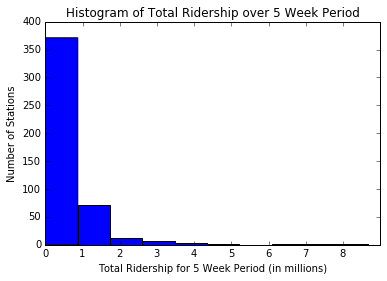

In [18]:
total_ridership_counts = list(df.sum(axis=0))
plt.hist(total_ridership_counts,align='mid')
plt.xticks(np.arange(0,9000000,1000000),np.arange(0,9,1))
plt.xlabel('Total Ridership for 5 Week Period (in millions)')
plt.ylabel('Number of Stations')
plt.title('Histogram of Total Ridership over 5 Week Period')